In [66]:
#dépendances
import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
from prettytable import PrettyTable
%matplotlib inline

def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

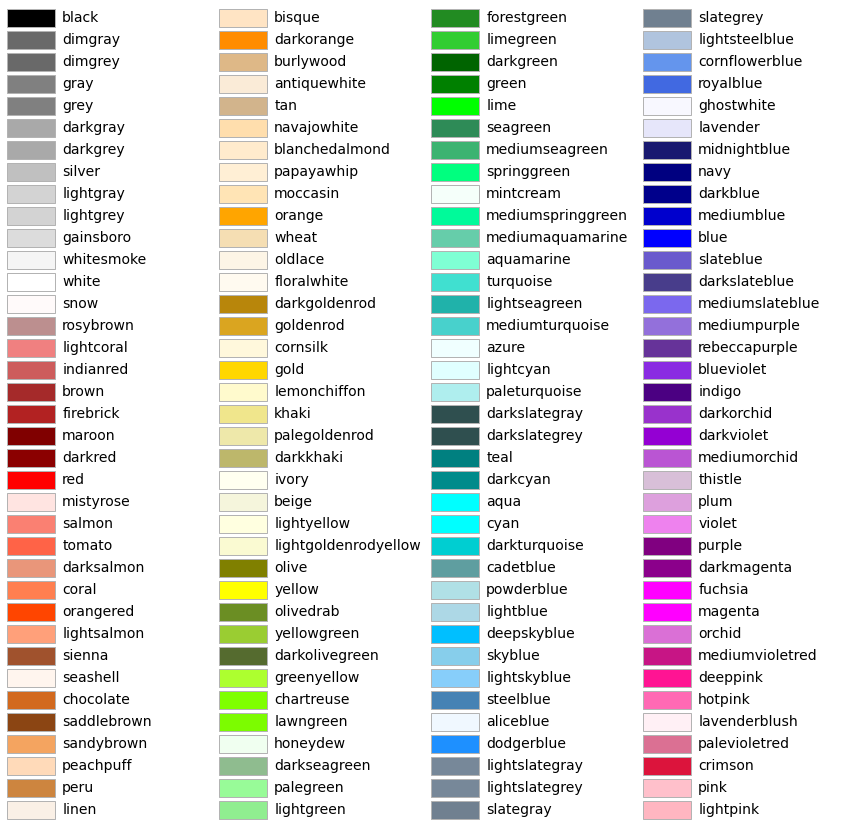

In [36]:
plot_colortable(mcolors.CSS4_COLORS)
plt.show()

# Multi-Class Prediction of Cirrhosis Outcomes

<img src="Stage_liver_disease.jpeg" width="400" height="400">

<img src="Description_features.png" width="800" height="800">

### Explanation

### Target take 3 values :
#### Class 0 (D): The patient didn't survived.
#### Class 1 (C): The patient is censored, meaning that the observation period ended without the event (death) occurring. This means patient still being alive at the time of studyinh this.
#### Class 2 (CL): Similar to Class 1, the patient is censored, but the reason for censorship is specifically due to liver transplantation.



In [37]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
path = r"C:\Users\Frederic\Documents\GitHub\Tennis_analysis\Prediction-of-Cirrhosis-Outcomes"
train_path = os.path.abspath(path) + "/data" +"/train.csv"
test_path = os.path.abspath(path) + "/data" +"/test.csv"
print(train_path)
print(test_path)

C:\Users\Frederic\Documents\GitHub\Tennis_analysis\Prediction-of-Cirrhosis-Outcomes/data/train.csv
C:\Users\Frederic\Documents\GitHub\Tennis_analysis\Prediction-of-Cirrhosis-Outcomes/data/test.csv


In [39]:
df_train=pd.read_csv(train_path,index_col='id')
df_train.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
id,,,,,,,,,,,,,,,,,,,
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [40]:
def find_col_dtypes(df, target, limit = 10):
    
    num_cols = df.select_dtypes("number").columns.to_list()
    cat_cols = df.select_dtypes("object").columns.to_list()
    cardinals = [col for col in cat_cols if df[col].nunique() == df.shape[0]]
    cat_but_num = [col for col in cat_cols if (df[col].nunique() > limit) & (col not in cardinals)]
    cat_cols = [col for col in df.columns if (df[col].nunique() < limit) & (col not in [target])]
    num_cols = [col for col in num_cols if (col not in cat_cols) & (col not in [target])] + cat_but_num
   
    print(f"Colonnes numériques : {num_cols}", end="\n\n")
    
    print("Voici le type des colonnes numériques : ", end="\n\n")
    df[num_cols].info()
    
    print(f"Colonnes catégorielles : {cat_cols}", end="\n\n")
    
    print("Voici le type des colonnes catégorielles: ", end="\n\n")
    df[cat_cols].info()
    
    table = PrettyTable()
    table.field_names = ["Features","Unique Values"]
    for i in list(df_train[cat_cols].columns) :
        nunique =df_train[cat_cols][str(i)].nunique
        table.add_row([i, f"{nunique()}"])
    print('Unique values in categorical columns : \n')
    print(table)
    
    return num_cols, cat_cols


In [41]:
target='Status'
limit=8
num_cols, cat_cols = find_col_dtypes(df=df_train, target=target, limit=limit)

Colonnes numériques : ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

Voici le type des colonnes numériques : 

<class 'pandas.core.frame.DataFrame'>
Index: 7905 entries, 0 to 7904
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         7905 non-null   int64  
 1   Age            7905 non-null   int64  
 2   Bilirubin      7905 non-null   float64
 3   Cholesterol    7905 non-null   float64
 4   Albumin        7905 non-null   float64
 5   Copper         7905 non-null   float64
 6   Alk_Phos       7905 non-null   float64
 7   SGOT           7905 non-null   float64
 8   Tryglicerides  7905 non-null   float64
 9   Platelets      7905 non-null   float64
 10  Prothrombin    7905 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 741.1 KB
Colonnes catégorielles : ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders'

## variable Stage

C:\Users\Frederic\AppData\Local\Temp\ipykernel_17360\3439869194.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df_train['Stage'].unique(),horizontalalignment='right')


Text(0, 0.5, 'Nombre')

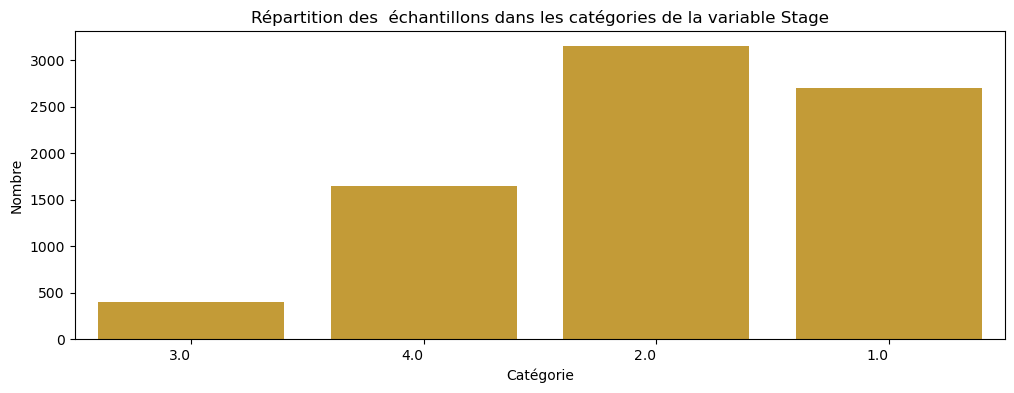

In [42]:
# Affichage des diagrammes en barres pour la variable 'stage
plt.figure(figsize=(12, 4))

# Diagramme en barres pour la Catégorie 1
plt.subplot(1, 1, 1)
ax = sns.countplot(data=df_train, x = 'Stage', color='goldenrod')
plt.title('Répartition des  échantillons dans les catégories de la variable Stage')
plt.xlabel('Catégorie')
ax.set_xticklabels(labels=df_train['Stage'].unique(),horizontalalignment='right')
plt.ylabel('Nombre')

In [43]:
df_train['Stage']=df_train['Stage'].astype('object')

# DataViz Cible

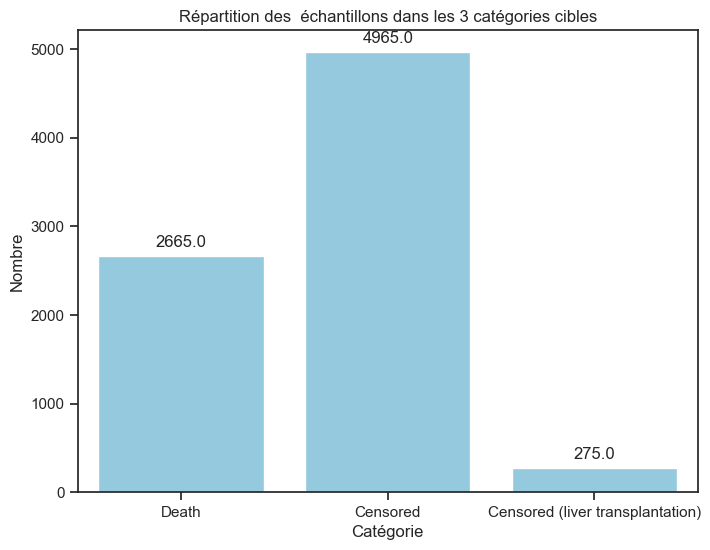

In [44]:
sns.set_theme(style="ticks")

# Affichage des diagrammes en barres pour chaque variable catégorielle
plt.figure(figsize=(8,6))

# Diagramme en barres pour la Catégorie 1
plt.subplot(1, 1, 1)
ax = sns.countplot(data=df_train, x = target, color='skyblue')
plt.title('Répartition des  échantillons dans les 3 catégories cibles')
plt.xlabel('Catégorie')
ax.set_xticks([0,1,2])
ax.set_xticklabels(labels=['Death','Censored','Censored (liver transplantation)'],horizontalalignment='center')
plt.ylabel('Nombre')
for p in ax.patches:
            ax.annotate(f'{round(p.get_height(),1)}', (p.get_x() + p.get_width() / 2., round(p.get_height(),1)),
            ha='center', va='center', xytext=(0, 10), textcoords='offset points')


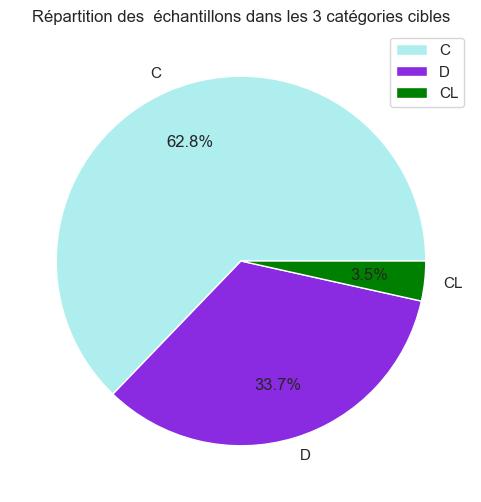

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))

plt.pie(df_train[target].value_counts(),labels = [df_train[target].unique()[1],df_train[target].unique()[0],df_train[target].unique()[2] ],
        colors=['paleturquoise', 'blueviolet','green'],
        autopct='%1.1f%%',
        pctdistance=0.7)
plt.title('Répartition des  échantillons dans les 3 catégories cibles')
plt.legend();

### Nan, lignes dupliquées

In [46]:
exploration(df_train)

NameError: name 'exploration' is not defined

In [47]:
help(sns.countplot)

Help on function countplot in module seaborn.categorical:

countplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, hue_norm=None, stat='count', width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', ax=None, **kwargs)
    Show the counts of observations in each categorical bin using bars.
    
    A count plot can be thought of as a histogram across a categorical, instead
    of quantitative, variable. The basic API and options are identical to those
    for :func:`barplot`, so you can compare counts across nested variables.
    
    Note that :func:`histplot` function offers similar functionality with additional
    features (e.g. bar stacking), although its default behavior is somewhat different.
    
    See the :ref:`tutorial <categorical_tutorial>` for more information.
    
    .. note::
        By default, this function treats one of the variables 

## variables catégorielles

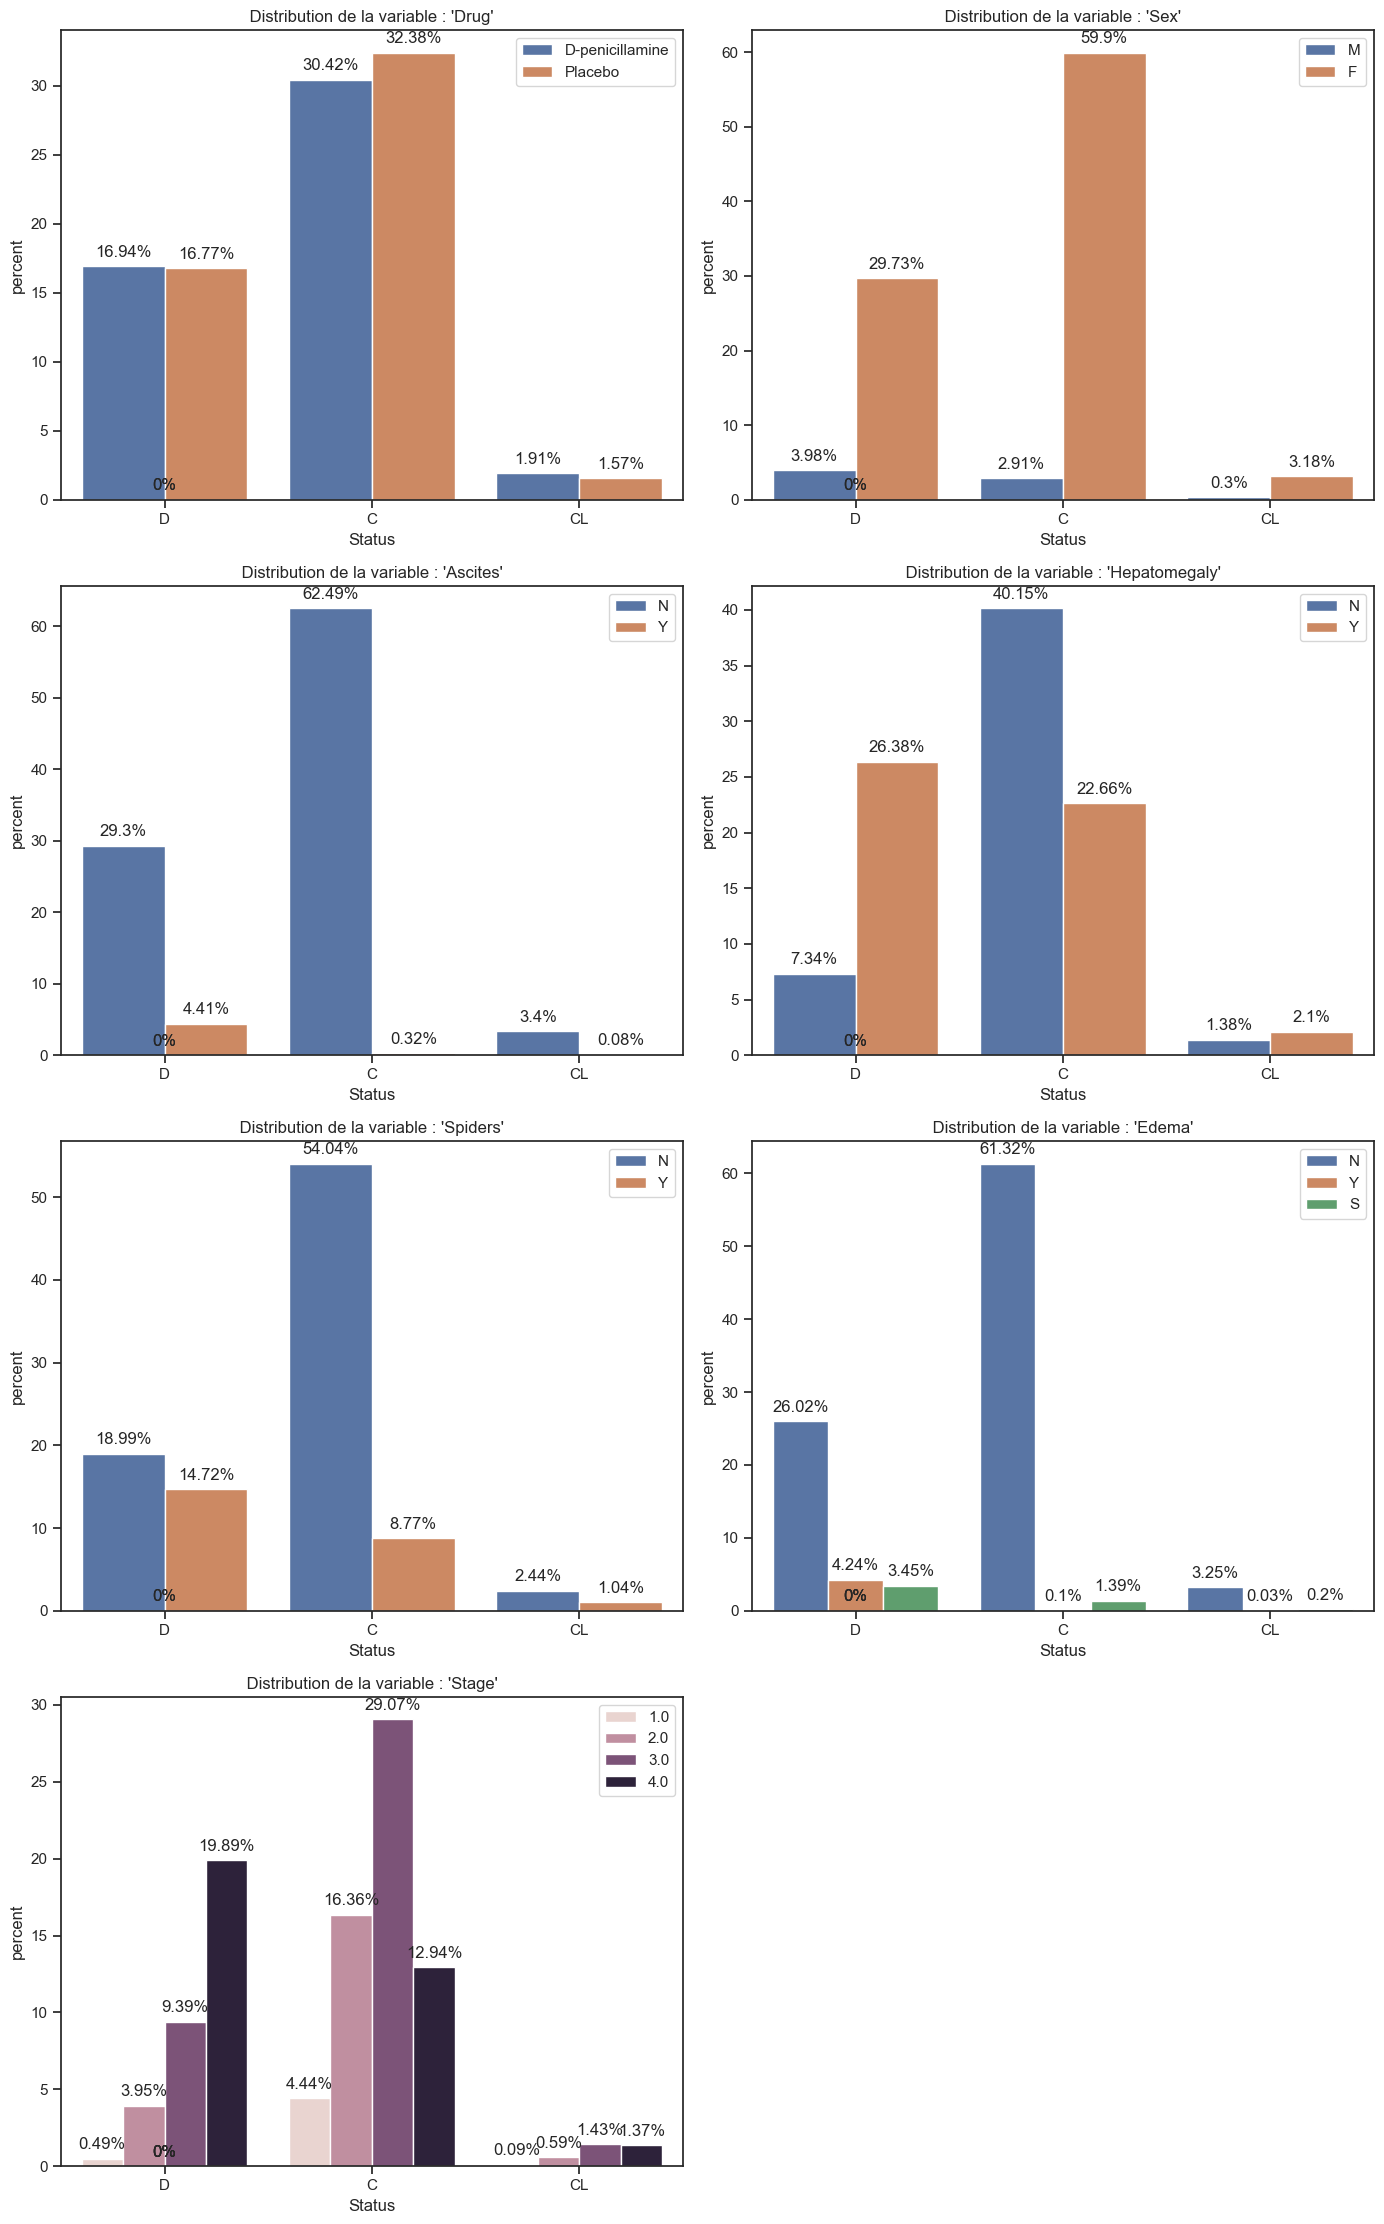

In [50]:
plt.figure(figsize=(14,len(cat_cols)*3.2))
for idx,column in enumerate(cat_cols):
        plt.subplot((len(cat_cols)//2)+1,2,idx+1)
        ax = sns.countplot(df_train, x=target, hue=column,stat="percent",legend='full')
        plt.title(f" Distribution de la variable : '{column}' ")
        # Ajouter les annotations
        for p in ax.patches:
            ax.annotate(f'{round(p.get_height(),2)}%', (p.get_x() + p.get_width() / 2., round(p.get_height(),2)),
            ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        plt.tight_layout()
        plt.legend()
plt.show();


import plotly.graph_objects as go
colors=['paleturquoise', 'blueviolet']

fig=go.Figure()
fig.add_trace(go.Pie(labels = [df['Drug'].unique()[1],df['Drug'].unique()[0]],
values = df['Drug'].value_counts(),
marker_colors = colors,  # Couleur de chaque partie du camembert 
# pull = [0.2,0] # Partie à éloigner du camembert 
                      ))
fig.show;

## Variables numériques

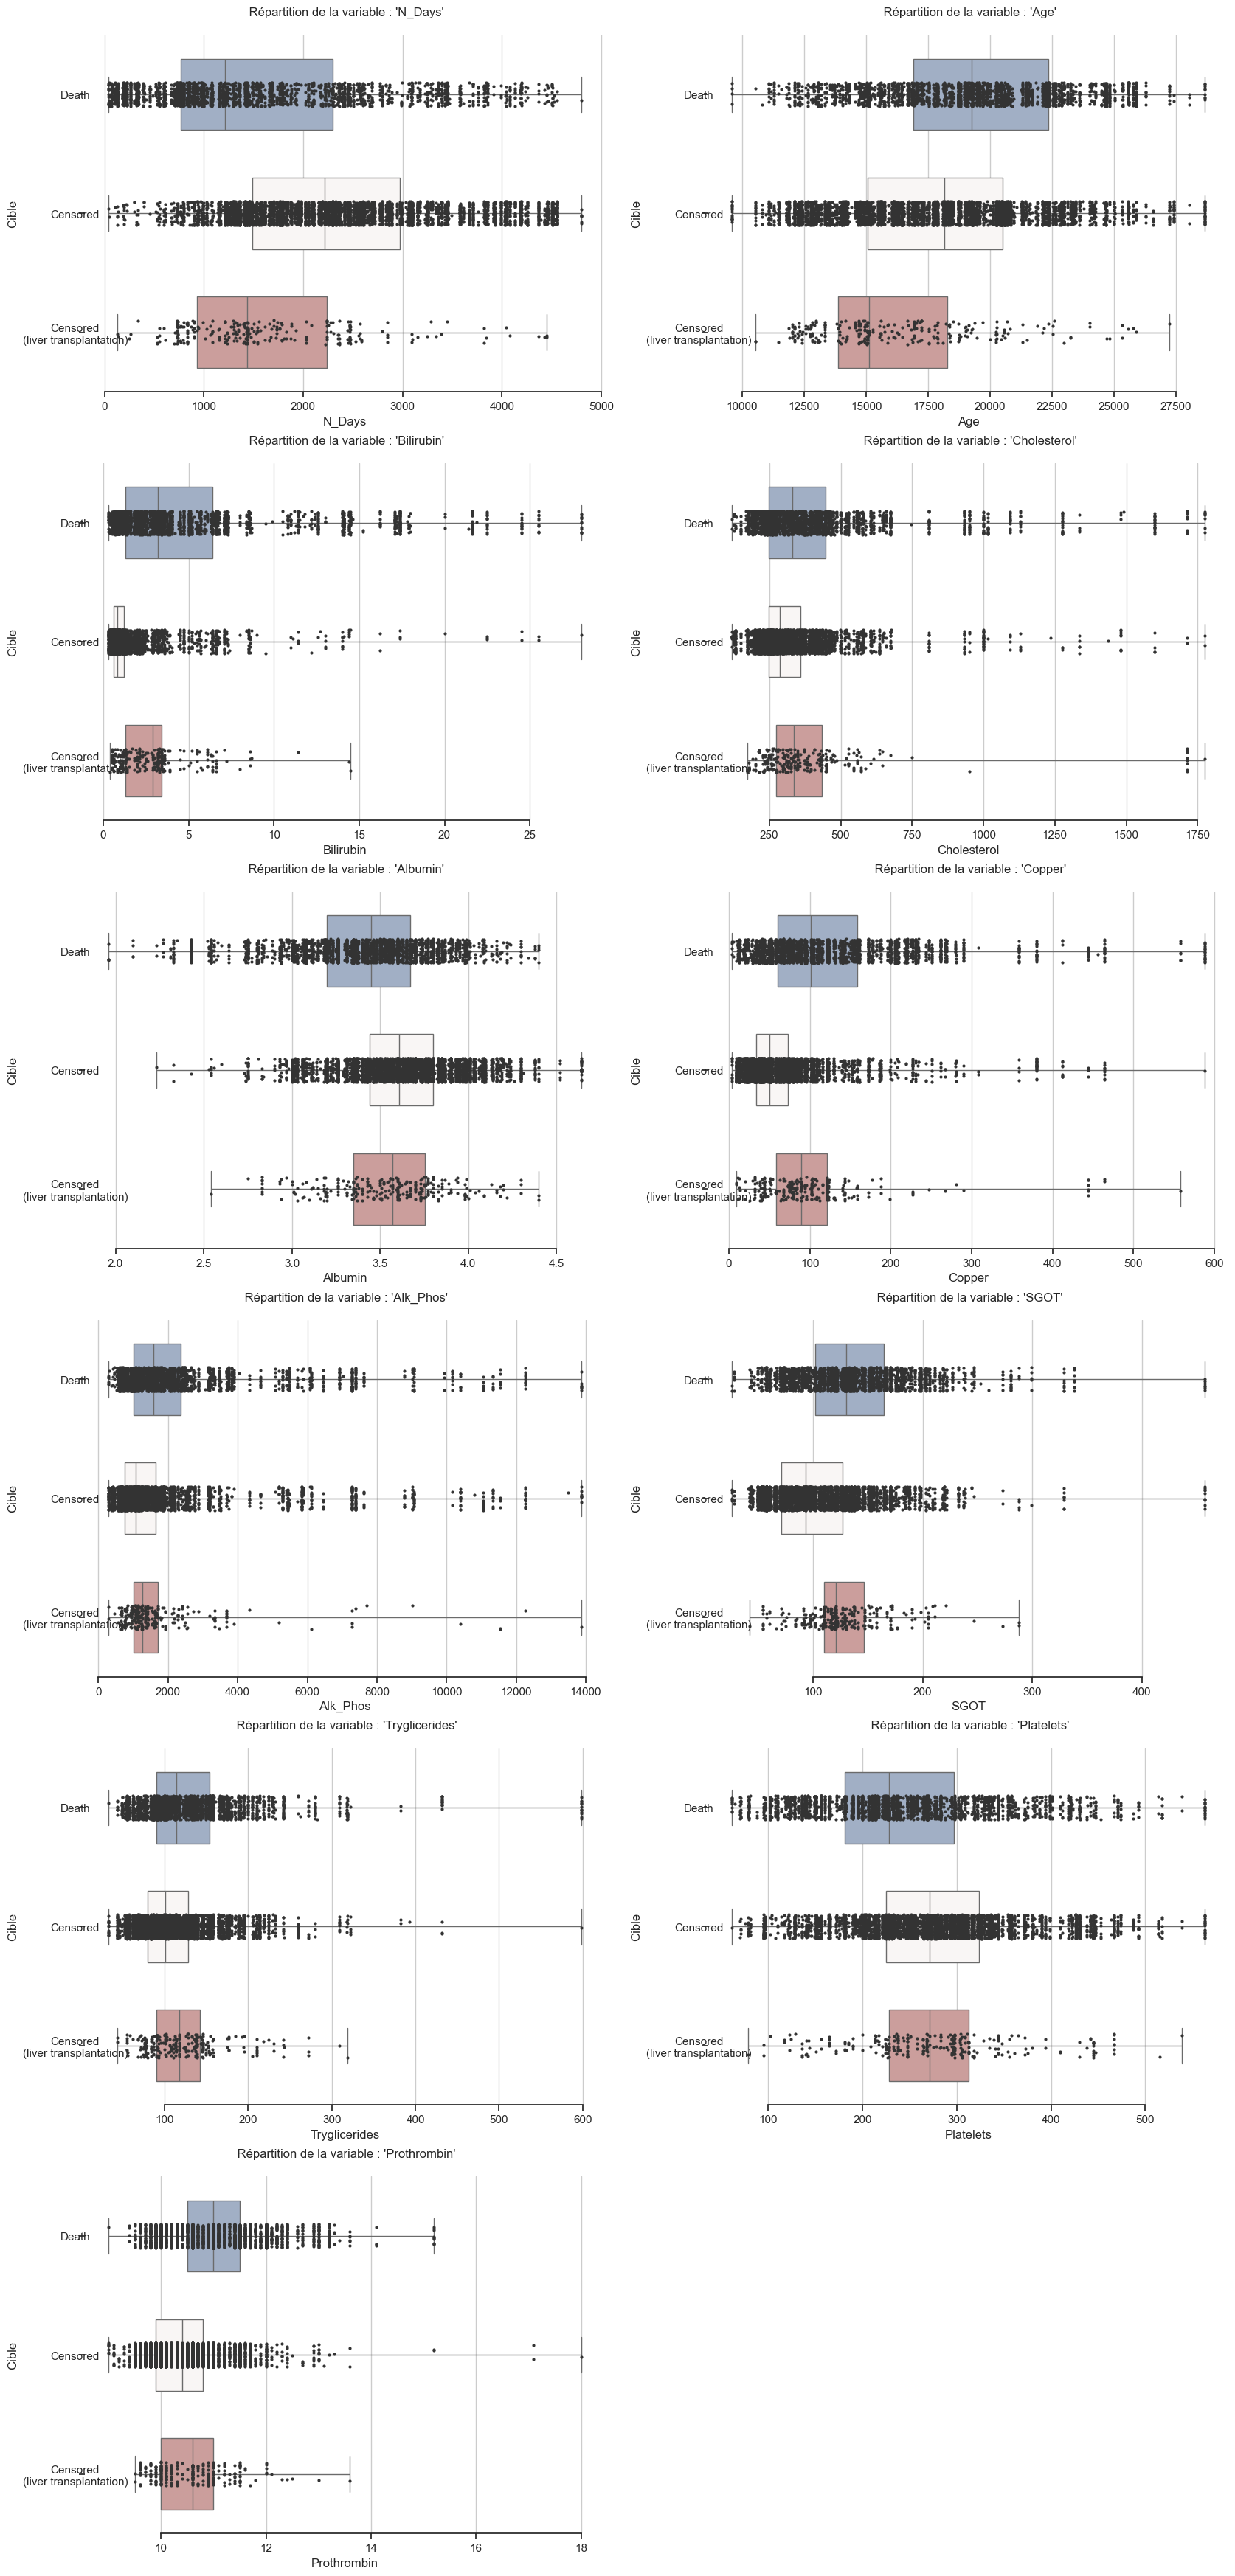

In [67]:
sns.set_theme(style="ticks")

plt.figure(figsize=(20,len(num_cols)*4))

for idx,column in enumerate(num_cols):
        ax = plt.subplot((len(num_cols)//2)+1,2,idx+1)
        #ax.set_xscale("log")
    
        # Plot the orbital period with horizontal boxes
        sns.boxplot(
        df_train, x=column, y=target , hue=target,
        whis=[0, 100], width=.6, palette="vlag"
        )
        plt.title(f" Répartition de la variable : '{column}'" + "\n" )
        ax.set_yticks([0,1,2])
        ax.set_yticklabels(labels=['Death','Censored','Censored' + '\n' + '(liver transplantation)'],horizontalalignment='center')
    
    # Add in points to show each observation
        sns.stripplot(df_train, x=column, y=target, size=3, color=".2")
    
        # Tweak the visual presentation
        ax.xaxis.grid(True)
        ax.set(ylabel="Cible")
        sns.despine(trim=True, left=True)
plt.show();      

## Analyse des corrélations

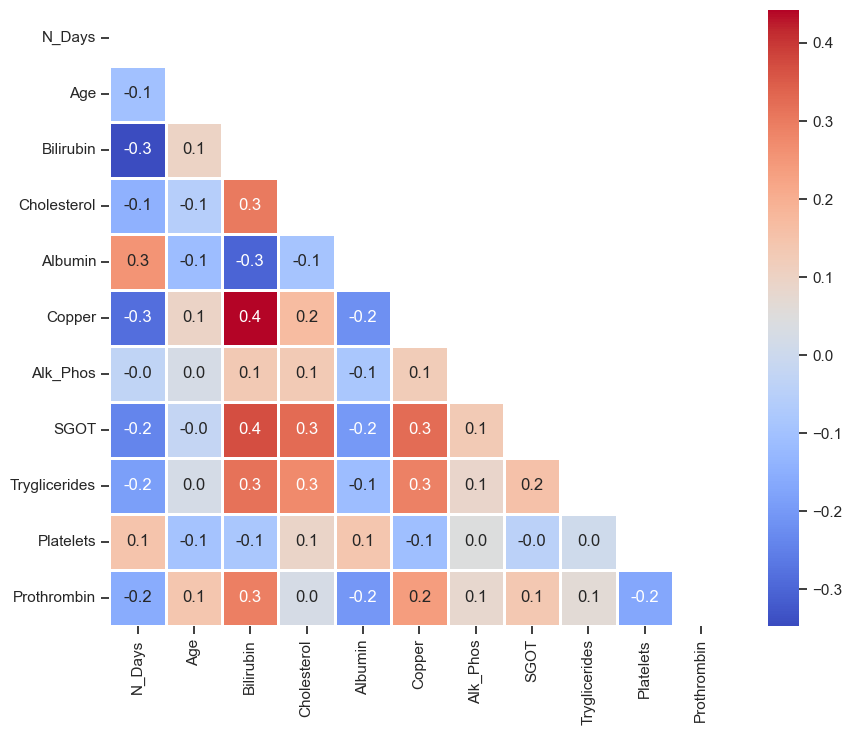

In [70]:
import numpy as np

corr = df_train[num_cols].corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(10,8))
mask= np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True,fmt=".1f", ax=ax, linewidths=1, mask=mask,cmap='coolwarm');
plt.show();
